# Case II Description

1. The case consists of doing an exploratory (unsupervised) analysis using the data source or parts of the data source.
2. Real-world applications often require working with non-standardized data, and designing an ML-pipeline from data curation and pre-processing to evaluation is part of the solution, as much as model development.
3. Please choose one of the following three topics and continue your exploration along that for the case:
- Explore clustering methods to derive insights from the data.
- Use decomposition and subspace methods to investigate low-dimension representation of the data.
- Employ Canonical correlation analysis and other supervised methods to model the response (emotions) using the features as input.

4. General tasks:
- An interpretation of the model should be present. 
- You are allowed to use other data sources as well. 
- You may supplement your unsupervised analysis with a supervised analysis, if you wish. 
- Formulate a clear purpose for your project, so the aim of your analysis is clear. 
- What are your research questions? 
- What kind of representation would you like to derive from the features of the biosignals? 
- What could it be used for?

### From evaluation pdf

- Make a presentation of the solution. 
- Make a technical foundation of your solution. 
- Make a clear aim and to what extent the aim is achieved, including expected accuracy (if supervised)
- Write the limitations of your work are important information to include in the presentation and the report. 
- Make a concise description of the chosen approach/method including pros and cons of the method should be included in the report


In [3]:
# read data
import pandas as pd

df=pd.read_csv('HR_data.csv')

print(df.head())

   Unnamed: 0  HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  \
0           0   78.663878         76.70   7.480043      67.25      92.48   
1           1   76.540732         76.61   2.584756      69.82      82.33   
2           2   78.173563         77.92   2.681255      72.22      82.80   
3           3   83.073688         83.88   7.363598      69.42      96.12   
4           4   72.281250         72.91   3.193762      64.95      79.98   

   HR_TD_AUC  HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  ...  upset  \
0  23048.450       -1.091448    0.369955          -0.7300  ...    1.0   
1  23959.920       -0.245338    0.338732          -0.3600  ...    2.0   
2  20324.605       -0.615922   -0.233047          -0.6300  ...    1.0   
3  24924.300       -0.866610   -0.046021          -0.4650  ...    1.0   
4  23052.100        0.200401   -0.560948          -0.3725  ...    3.0   

   hostile  alert  ashamed  inspired  nervous  attentive  afraid  active  \
0      1.0    2.0      1.0  

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 68 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           312 non-null    int64  
 1   HR_TD_Mean           312 non-null    float64
 2   HR_TD_Median         312 non-null    float64
 3   HR_TD_std            312 non-null    float64
 4   HR_TD_Min            312 non-null    float64
 5   HR_TD_Max            312 non-null    float64
 6   HR_TD_AUC            312 non-null    float64
 7   HR_TD_Kurtosis       312 non-null    float64
 8   HR_TD_Skew           312 non-null    float64
 9   HR_TD_Slope_min      312 non-null    float64
 10  HR_TD_Slope_max      312 non-null    float64
 11  HR_TD_Slope_mean     312 non-null    float64
 12  HR_TD_Slope          312 non-null    float64
 13  TEMP_TD_Mean         312 non-null    float64
 14  TEMP_TD_Median       312 non-null    float64
 15  TEMP_TD_std          312 non-null    flo

In [5]:
headers=df.columns.tolist()
#print(headers)

# numerical 
numerical_columns = headers[1:52]
print(numerical_columns)

# Rounds and Phase are ordinal categorical
ordicat_columns=[ x for x in headers[52:] if x not in ['Cohort','Individual','Puzzler'] ]
print(ordicat_columns)

# Cohort Individual and Puzzler is NOMINAL
nomicat_columns=[headers[57],headers[55]]
print(nomicat_columns)

['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']
['Round', 'Phase', 'Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'attentive

In [6]:
print(df[['Individual','Puzzler','Cohort','Round','Phase','Frustrated']])
# Print unique values of specific columns
print("Unique values in 'Individual':", df['Individual'].unique())
print("Unique values in 'Puzzler':", df['Puzzler'].unique())
print("Unique values in 'Cohort':", df['Cohort'].unique())
print("Unique values in 'Round':", df['Round'].unique())
print("Unique values in 'Phase':", df['Phase'].unique())
print("Unique values in 'Frustrated':", df['Frustrated'].unique())



     Individual  Puzzler Cohort    Round   Phase  Frustrated
0             1        1   D1_4  round_3  phase3         2.0
1             1        1   D1_4  round_3  phase2         3.0
2             1        1   D1_4  round_3  phase1         2.0
3             1        1   D1_4  round_2  phase3         2.0
4             1        1   D1_4  round_2  phase2         2.0
..          ...      ...    ...      ...     ...         ...
307          26        1   D1_5  round_4  phase2         7.0
308          26        1   D1_5  round_4  phase1         2.0
309          26        1   D1_5  round_1  phase3         2.0
310          26        1   D1_5  round_1  phase2         3.0
311          26        1   D1_5  round_1  phase1         0.0

[312 rows x 6 columns]
Unique values in 'Individual': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]
Unique values in 'Puzzler': [1 0]
Unique values in 'Cohort': ['D1_4' 'D1_6' 'D1_1' 'D1_2' 'D1_3' 'D1_5']
Unique values in 'Round': [

Unique values in 'Cohort': ['D1_4' 'D1_6' 'D1_1' 'D1_2' 'D1_3' 'D1_5']   
Unique values in 'Round': ['round_3' 'round_2' 'round_4' 'round_1']   
Unique values in 'Phase': ['phase3' 'phase2' 'phase1']   

tHE ABOVE ARE object types and are considered categorical values

In [7]:
# change object types to numbers (Round, Phase, Cohort)
# Replace 'column_name' with the name of your column
df['Round'] = df['Round'].apply(lambda x: int(x[-1]) if isinstance(x, str) else x)
df['Phase'] = df['Phase'].apply(lambda x: int(x[-1]) if isinstance(x, str) else x)
df['Cohort'] = df['Cohort'].apply(lambda x: int(x[-1]) if isinstance(x, str) else x)

In [8]:
# replace nan in numerical with median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
# replace nan in categorical with mode
df[ordicat_columns] = df[ordicat_columns].fillna(df[ordicat_columns].mode().iloc[0])
df[nomicat_columns] = df[nomicat_columns].fillna(df[nomicat_columns].mode().iloc[0])

# make ordicat_columns integers and DONE with 
df[ordicat_columns] = df[ordicat_columns].astype(int)

# one hot encode categorical
df = pd.get_dummies(df, columns=nomicat_columns, drop_first=True)

# scale  and standardize numerical 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[ordicat_columns] = scaler.fit_transform(df[ordicat_columns])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
# This is probably wrong.
df[ordicat_columns] = scaler.fit_transform(df[ordicat_columns])

In [9]:
#df.head()
X = df.drop(['Unnamed: 0','Individual'], axis=1)
print(X.head())

   HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0    0.010023     -0.062352   0.187214  -0.163880   0.001629  -0.312526   
1   -0.176801     -0.069806  -0.793634   0.111690  -0.570809  -0.086288   
2   -0.033122      0.038688  -0.774299   0.369032  -0.544302  -0.988619   
3    0.398059      0.532294   0.163883   0.068800   0.206917   0.153083   
4   -0.551609     -0.376240  -0.671610  -0.410499  -0.703343  -0.311621   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  \
0       -0.621392   -0.007322        -0.414857         0.978121  ...   
1       -0.114281   -0.045281         0.532375        -0.699948  ...   
2       -0.336389   -0.740408        -0.158848        -0.343025  ...   
3       -0.486637   -0.513035         0.263566         0.280258  ...   
4        0.152870   -1.139046         0.500374        -0.385643  ...   

   attentive    afraid    active  determined  Cohort_2  Cohort_3  Cohort_4  \
0   0.193413 -0.188144 -0.471136   -0.

In [11]:
from sklearn.decomposition import FastICA
import numpy as np
from scipy.stats import kurtosis

# Define the number of components (e.g., 5 components)
n_components = 3

# Initialize the ICA model
ica = FastICA(n_components=n_components, random_state=42)

print('numerical X shape: ',np.shape(X))

# Apply ICA to the numerical data
independent_components = ica.fit_transform(X)

# Determine the number of components to use using the kurtosis criterion
kurtosis_scores = [kurtosis(independent_components[:, i]) for i in range(independent_components.shape[1])]
print(kurtosis_scores)
n_components = np.argmax(kurtosis_scores) + 1
print(n_components)

# Convert the result to a DataFrame for easier interpretation
ica_df = pd.DataFrame(independent_components, columns=[f'IC_{i+1}' for i in range(n_components+1)])

# Display the independent components
print('ica_df shape: ',np.shape(ica_df))
print(ica_df.head())

numerical X shape:  (312, 70)
[4.810357890670771, 8.659928183815527, 1.6716030413026228]
2
ica_df shape:  (312, 3)
       IC_1      IC_2      IC_3
0 -0.069756 -0.007108  0.023254
1 -0.047251 -0.027818  0.011686
2 -0.061505 -0.031402  0.022224
3 -0.026882 -0.043830 -0.033680
4 -0.089989 -0.002865  0.007818


The **kurtosis criterion** is a statistical measure used to evaluate the "tailedness" or peakedness of a distribution. In the context of Independent Component Analysis (ICA), it is often used to determine the number of independent components to retain for analysis.

### Key Points About Kurtosis:
1. **Definition**: Kurtosis measures the shape of a distribution compared to a normal distribution. 
   - A normal distribution has a kurtosis of 3 (excess kurtosis = 0).
   - Positive kurtosis indicates a distribution with heavy tails and sharp peaks.
   - Negative kurtosis indicates a distribution with light tails and a flatter peak.

2. **Why It Matters in ICA**:
   - ICA seeks to find statistically independent components in the data.
   - Independent components often exhibit non-Gaussian distributions.
   - Kurtosis is a useful measure to identify non-Gaussianity, as independent components typically have higher kurtosis compared to Gaussian noise.

3. **How It Helps Determine the Number of Components**:
   - After applying ICA, the kurtosis of each independent component is calculated.
   - Components with higher kurtosis are more likely to represent meaningful, non-Gaussian signals.
   - By ranking components based on their kurtosis, you can select the top components that capture the most significant independent signals in the data.

### Example in Your Code:
In your code, the kurtosis criterion is used as follows:

kurtosis_scores = [kurtosis(independent_components[:, i]) for i in range(independent_components.shape[1])]   
n_components = np.argmax(kurtosis_scores) + 1   


- **Step 1**: The kurtosis of each independent component is calculated.
- **Step 2**: The component with the highest kurtosis is identified using `np.argmax(kurtosis_scores)`.
- **Step 3**: The number of components to retain is determined based on this ranking.

### Why It Works:
- Components with higher kurtosis are more likely to represent meaningful, independent signals rather than noise.
- This approach ensures that the retained components are the most informative for further analysis.

### Limitations:
- The kurtosis criterion assumes that meaningful signals are non-Gaussian, which may not always be true for all datasets.
- It may not work well if the data contains Gaussian signals or if the independent components are not strongly non-Gaussian.

By using the kurtosis criterion, you can focus on the most relevant independent components, simplifying your analysis and improving interpretability.

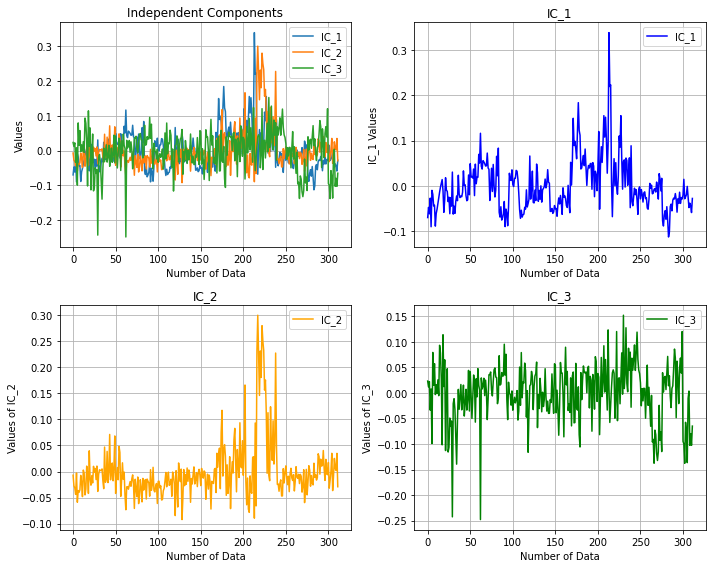

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data on each subplot
for i in range(ica_df.shape[1]):
    axs[0,0].plot(ica_df[f'IC_{i+1}'], label=f'IC_{i+1}')
axs[0, 0].set_title("Independent Components")
axs[0, 0].set_xlabel("Number of Data")
axs[0, 0].set_ylabel("Values")
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].plot(ica_df[f'IC_1'], label=f'IC_1',color='blue')
axs[0, 1].set_title("IC_1")
axs[0, 1].set_xlabel("Number of Data")
axs[0, 1].set_ylabel("IC_1 Values")
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].plot(ica_df[f'IC_2'], label=f'IC_2',color='orange')
axs[1, 0].set_title("IC_2")
axs[1, 0].set_xlabel("Number of Data")
axs[1, 0].set_ylabel("Values of IC_2")
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].plot(ica_df[f'IC_3'], label=f'IC_3', color='green')
axs[1, 1].set_title("IC_3")
axs[1, 1].set_xlabel("Number of Data")
axs[1, 1].set_ylabel("Values of IC_3")
axs[1, 1].grid(True)
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

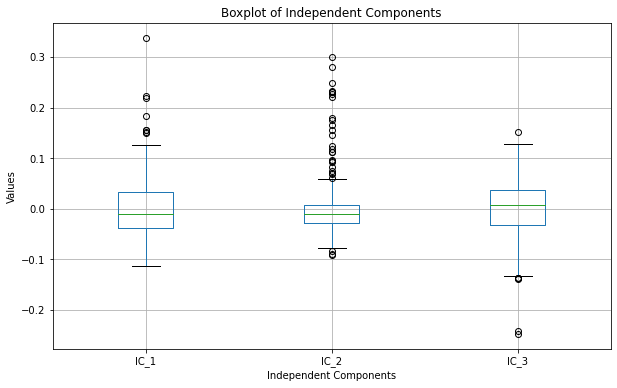

Extreme values (True indicates an outlier):
      IC_1   IC_2   IC_3
0    False  False  False
1    False  False  False
2    False  False  False
3    False  False  False
4    False  False  False
..     ...    ...    ...
307  False  False  False
308  False  False  False
309  False  False  False
310  False  False  False
311  False  False  False

[312 rows x 3 columns]
(312, 3)
Indices of extreme values: (array([171, 177, 207, 209, 213, 214, 215, 227], dtype=int64),)
Indices of extreme values: (array([ 43,  49, 120, 128, 174, 175, 189, 190, 196, 202, 213, 214, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 229, 232,
       235, 238], dtype=int64),)
Indices of extreme values: (array([ 29,  34,  62, 230, 266, 302, 305], dtype=int64),)
     HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
171   -0.275328     -0.159252  -0.951387   0.402272  -0.756921  -0.417854   
177    0.168234      0.201429  -0.706722   0.788284  -0.186176  -0.023262   
207   -0.9

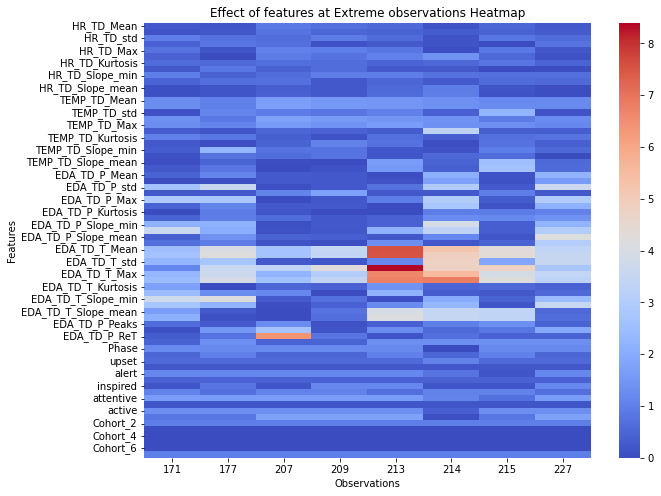

     HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
43    -0.214281      0.046970   0.283183  -0.563832  -0.326042  -0.177877   
49     0.406354      0.150909   0.558549   0.411922   0.632720   0.303440   
120   -1.195235     -1.219760   0.222370  -1.228631  -0.173204  -1.117985   
128   -1.366631     -1.445444   0.192832  -1.420565  -0.830802  -1.279490   
174   -0.348502     -0.270644  -0.675553   0.128846  -0.592240  -0.387500   

     HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  \
43        -0.874316   -0.713805         0.372369        -0.156573  ...   
49        -0.281907    0.663806         0.685980        -0.028720  ...   
120        1.910122    1.963923        -0.933274        -0.428260  ...   
128       -0.506503    0.545625        -0.171649        -0.268444  ...   
174       -0.211871    0.230636         0.551575        -0.385643  ...   

     attentive    afraid    active  determined  Cohort_2  Cohort_3  Cohort_4  \
43    1.0940

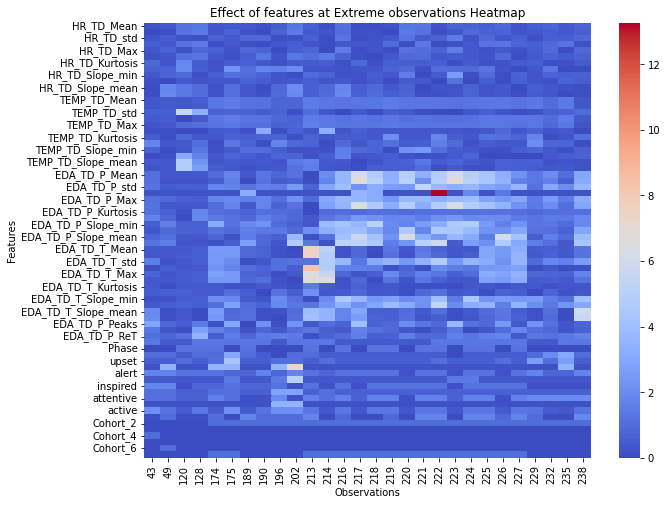

     HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
29     3.820041      3.471570   0.470052   4.534749   3.840060   3.134713   
34     2.173205      2.161360   0.882254   1.806928   1.985138   2.088370   
62     6.458080      7.494958   4.489149   2.042824   4.512886   5.401707   
230   -1.842929     -1.771340  -0.346306  -1.586765  -1.068237  -1.702943   
266    2.727777      2.075228   3.520439   1.106744   3.303154   2.099228   

     HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  \
29         3.302407    2.239581        -2.418124         0.386802  ...   
34        -0.062861    0.031603         0.058759        -0.183209  ...   
62         0.159670   -2.112787        -2.430925         1.095320  ...   
230        2.317437    2.225152         0.020358        -0.774529  ...   
266       -0.708722    0.076168        -1.490093         0.866250  ...   

     attentive    afraid    active  determined  Cohort_2  Cohort_3  Cohort_4  \
29    1.0940

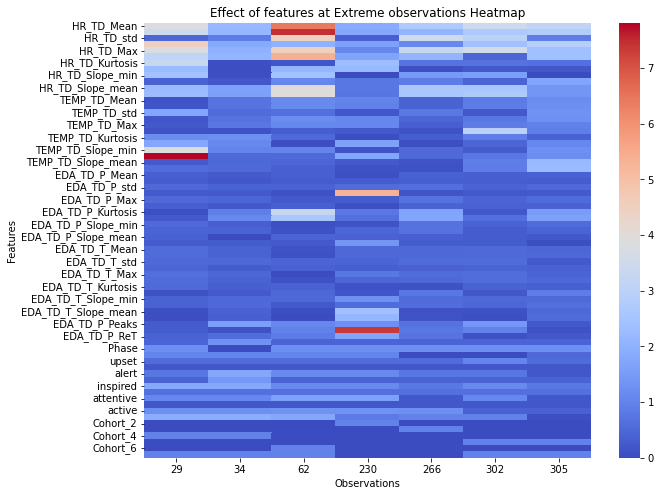

In [77]:
# based on the plots, I have to determine outliers and find the exact number of the data

import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each independent component
ica_df.boxplot(figsize=(10, 6))
plt.title("Boxplot of Independent Components")
plt.xlabel("Independent Components")
plt.ylabel("Values")
plt.show()

# Calculate Q1, Q3, and IQR for each independent component
Q1 = ica_df.quantile(0.25)
Q3 = ica_df.quantile(0.75)
IQR = Q3 - Q1

# Identify extreme values
extreme_values = (ica_df < (Q1 - 1.5 * IQR)) | (ica_df > (Q3 + 1.5 * IQR))

# Print the extreme values
print("Extreme values (True indicates an outlier):")
print(extreme_values)
print(np.shape(extreme_values))

# Optionally, get the indices of extreme values
ic1_ex = np.where(extreme_values['IC_1'])
ic2_ex = np.where(extreme_values['IC_2'])
ic3_ex = np.where(extreme_values['IC_3'])
print("Indices of extreme values:", ic1_ex)
print("Indices of extreme values:", ic2_ex)
print("Indices of extreme values:", ic3_ex)

# make HEATMAP for the observations, this is to see which features affect the observations the most
# READ ME: These are the extreme values of the ICs. So you must seperate the feautes that effect the 
# extreme obs for each IC

aex=[list(ic1_ex[0]),list(ic2_ex[0]),list(ic3_ex[0])]

for i in aex:
    #print(aex)
    EX=X.iloc[i]
    print(EX.head())
    print(np.shape(EX))
    TEX=EX.T

    # Generate a 70x3 random dataset for demonstration
    data = TEX  # Replace this with your actual data
    columns = TEX.columns.tolist()
    idf = pd.DataFrame(data, columns=columns)
    idf=idf.abs()

    # Create the heatmap
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    sns.heatmap(idf, annot=False, cmap='coolwarm', cbar=True)

    # Add labels and title
    plt.title("Effect of features at Extreme observations Heatmap")
    plt.xlabel("Observations")
    plt.ylabel("Features")

    # Show the plot
    plt.show()


Interpret the ICs in Context
Domain Knowledge: Use your understanding of the dataset to interpret what each IC might represent. For example:
In biosignal data, an IC might represent a specific physiological signal (e.g., heart rate or stress level).
In financial data, an IC might represent a market trend or anomaly.
Correlate ICs with Known Variables: If you have labels or other metadata, correlate them with the ICs to identify relationships:

Think of the blinking epxeriment. (https://towardsdatascience.com/independent-component-analysis-ica-a3eba0ccec35/)  
He plotted the independed components to find the outliers/spikes in the signal that indicated blinking.   
So here we have outliers

(70, 3)


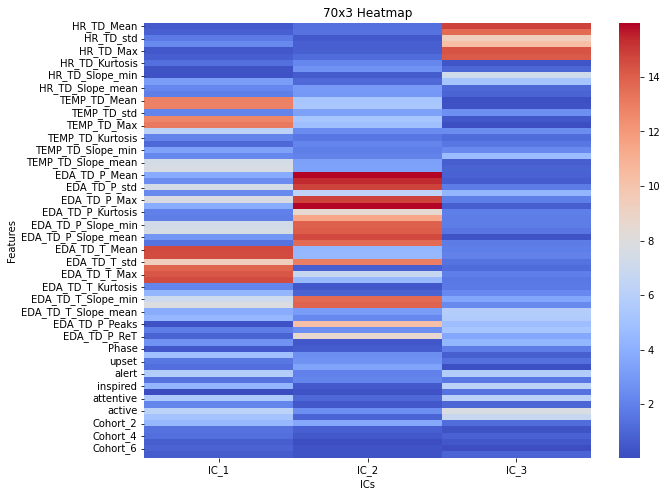

In [75]:
#3. Relate ICs to Original Features
#The mixing_ matrix from the ICA model shows how the original features contribute to each IC:

#Each column of the mixing_ matrix corresponds to an IC, and each row corresponds to an original feature. 
# Larger absolute values indicate stronger contributions.

print(np.shape(ica.mixing_))
#print(ica.mixing_)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a 70x3 random dataset for demonstration
data = ica.mixing_  # Replace this with your actual data
columns = ['IC_1', 'IC_2', 'IC_3']
idf = pd.DataFrame(data, index=X.columns,columns=columns)
idf=idf.abs()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(idf, annot=False, cmap='coolwarm', cbar=True)

# Add labels and title
plt.title("70x3 Heatmap")
plt.xlabel("ICs")
plt.ylabel("Features")

# Show the plot
plt.show()

In [ ]:
# Corelations the same as before HEATMAp
# Create a dictionary to store correlations greater than the mean
IC_correlations = {}

# Iterate over each IC column
for ic in ica_df.columns:
    # Compute correlations between the IC column and all other features in X
    correlations = idf[ic]
    
    # Filter correlations greater than the mean
    filtered_correlations = correlations[correlations > 10]
    
    # Store the filtered correlations in the dictionary
    IC_correlations[ic] = filtered_correlations.index.tolist()
# Print the resulting dictionary
print(IC_correlations)
IC_correlations['IC_1_n']=[X.columns.tolist()[i] for i in IC_correlations['IC_1']]
IC_correlations['IC_2_n']=[X.columns.tolist()[i] for i in IC_correlations['IC_2']]
IC_correlations['IC_3_n']=[X.columns.tolist()[i] for i in IC_correlations['IC_3']]

print(IC_correlations['IC_1_n'])
print(' ')
print(IC_correlations['IC_2_n'])
common_values = set(IC_correlations['IC_1_n']) & set(IC_correlations['IC_2_n'])
print(common_values)

# Add sns pairplot here for the features

{'IC_1': [12, 13, 15, 16, 36, 37, 39, 40, 41], 'IC_2': [24, 25, 26, 28, 29, 31, 32, 33, 34, 35, 38, 44, 45, 48], 'IC_3': [0, 1, 3, 4, 5]}
['TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_Min', 'TEMP_TD_Max', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC']
 
['EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_std', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_P_Peaks']
set()


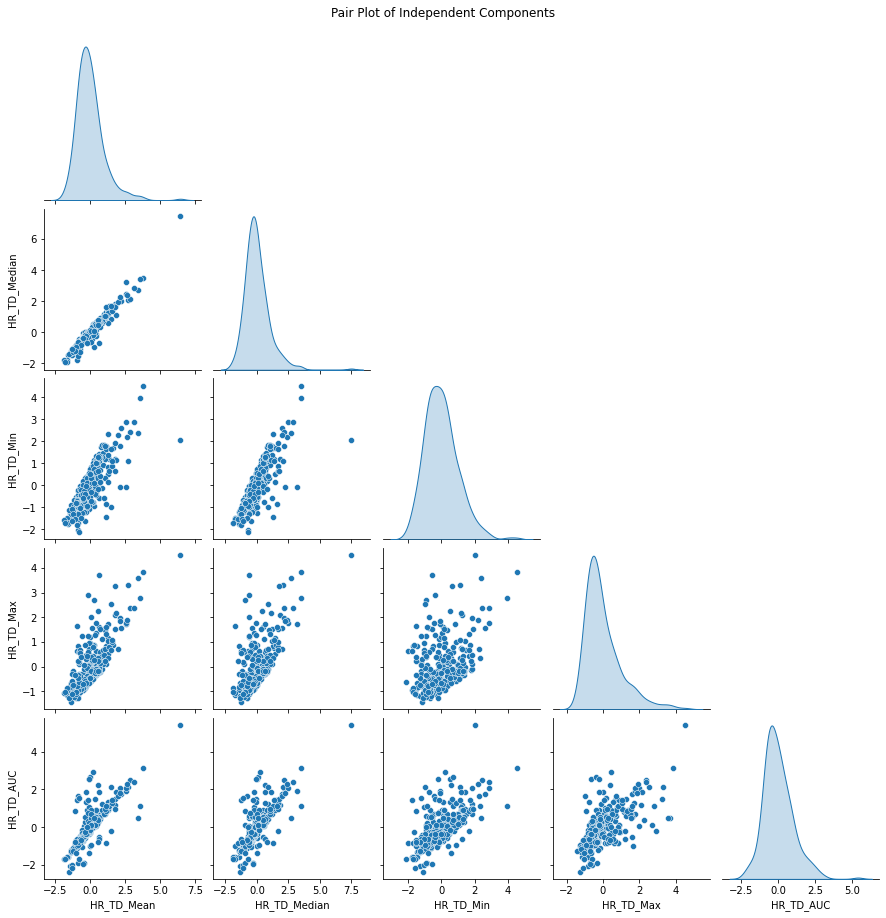

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of the DataFrame for the pair plot (e.g., numerical columns or independent components)
pairplot_data = X[IC_correlations['IC_3_n']]  # Replace with the DataFrame you want to visualize

# Create the pair plot
sns.pairplot(pairplot_data, diag_kind="kde", corner=True)

# Add a title to the plot
plt.suptitle("Pair Plot of Independent Components", y=1.02)

# Show the plot
plt.show()


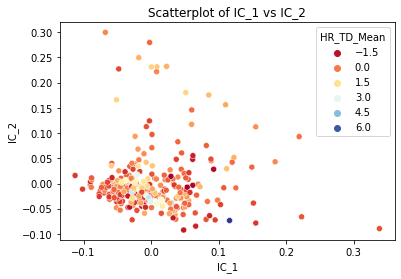

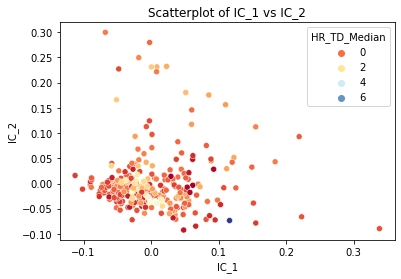

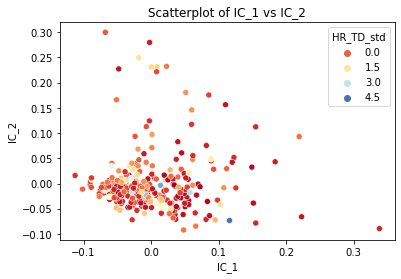

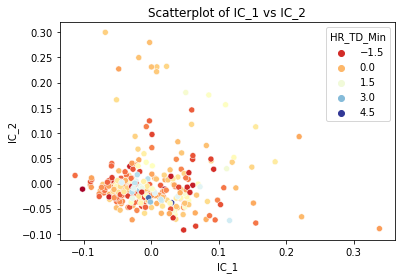

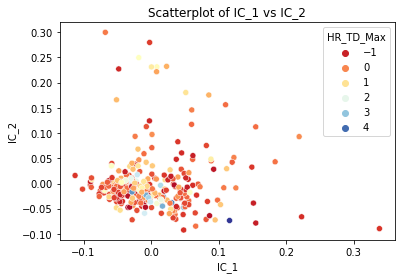

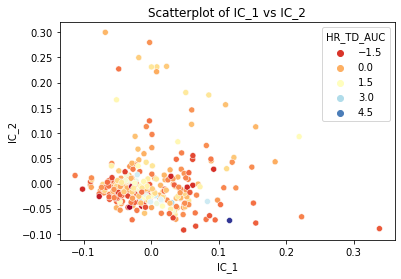

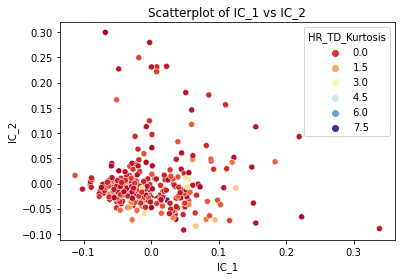

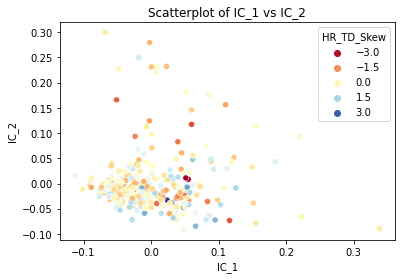

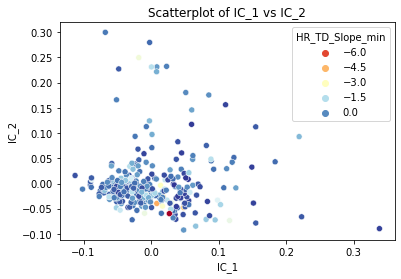

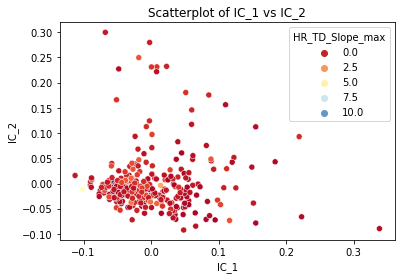

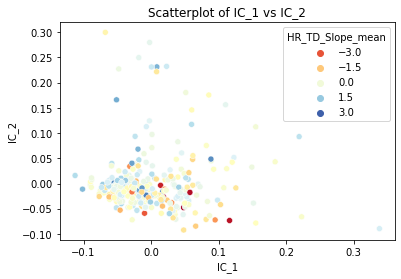

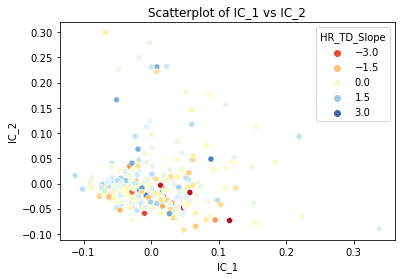

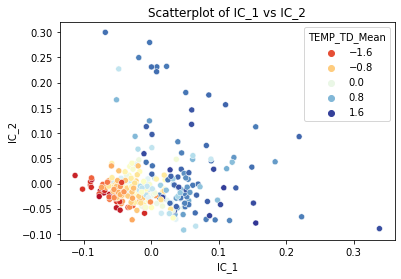

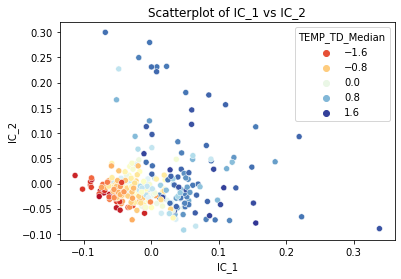

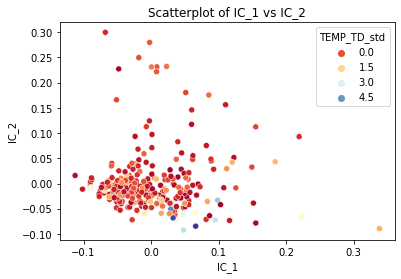

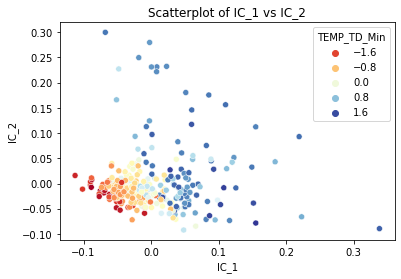

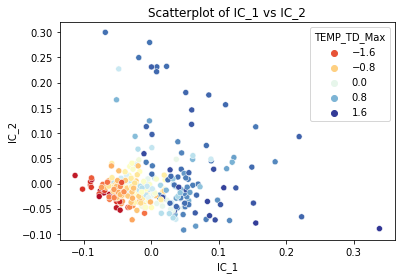

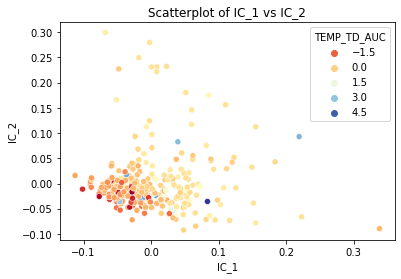

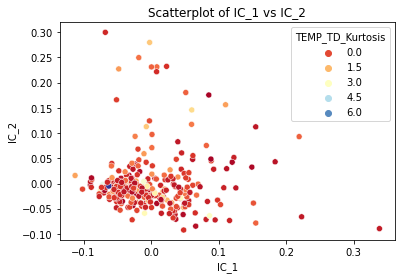

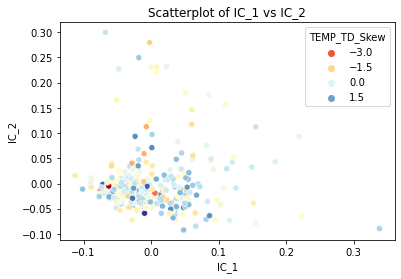

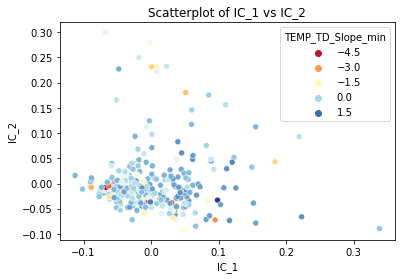

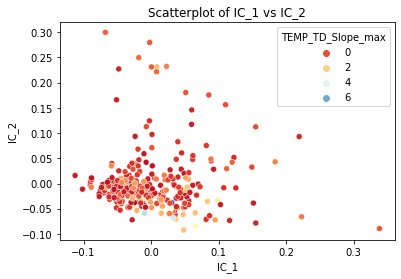

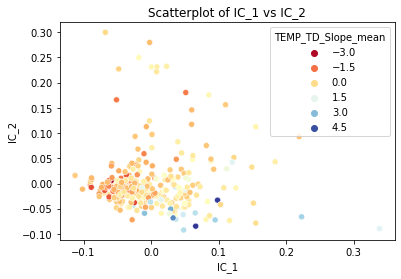

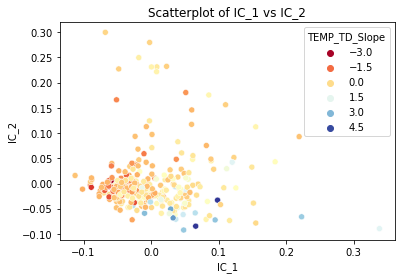

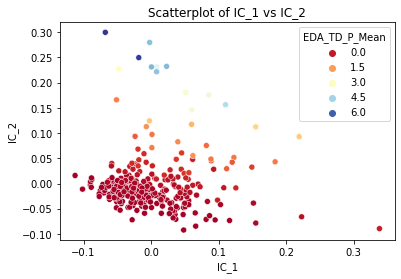

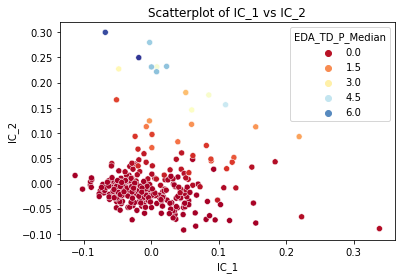

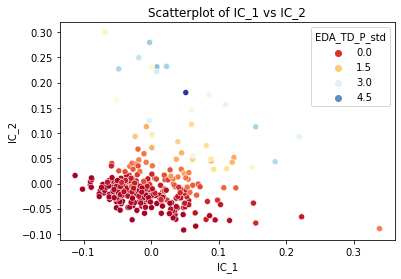

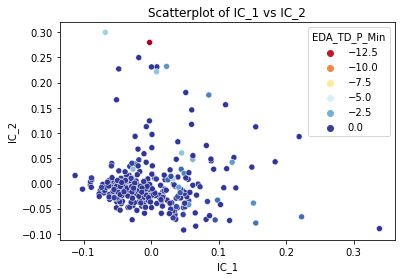

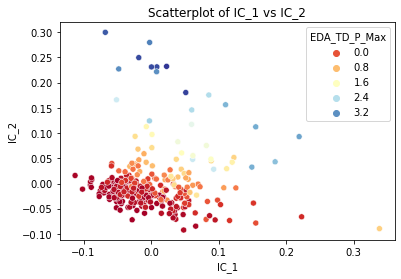

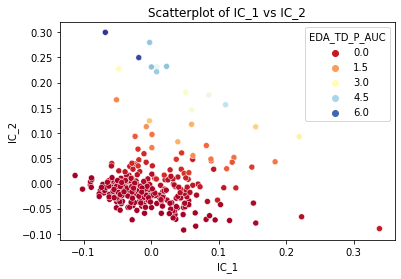

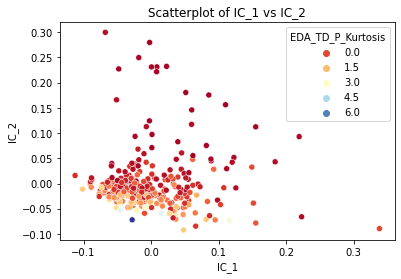

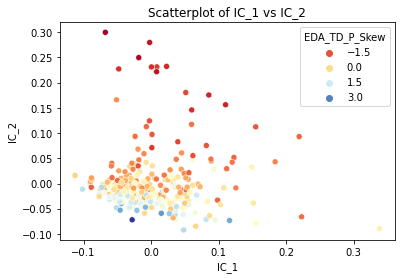

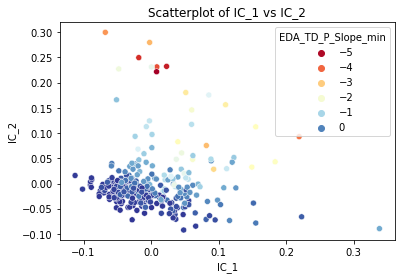

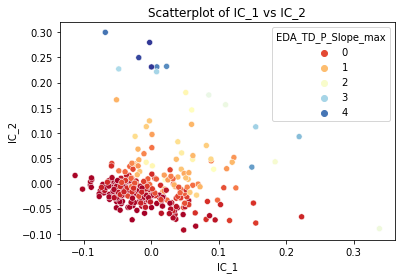

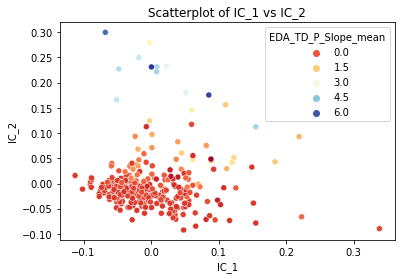

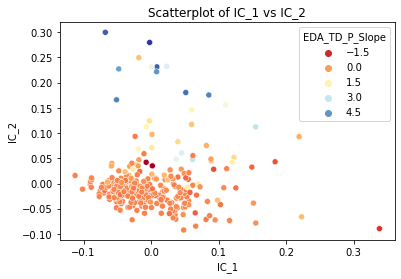

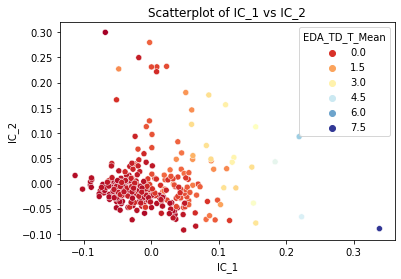

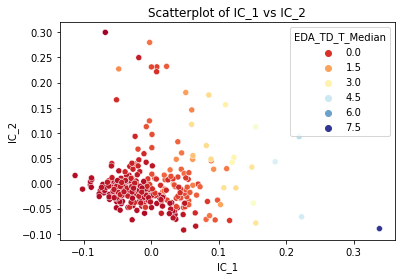

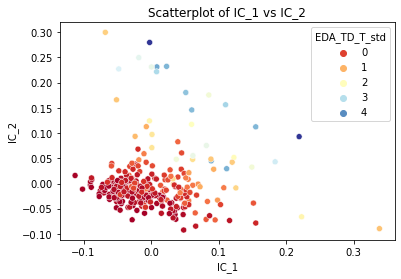

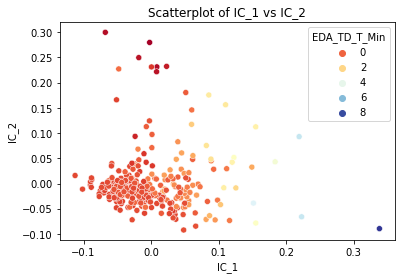

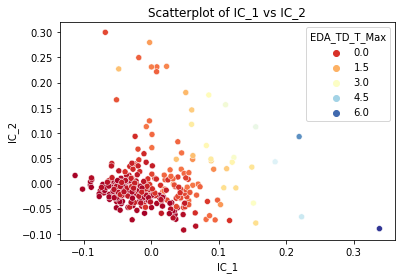

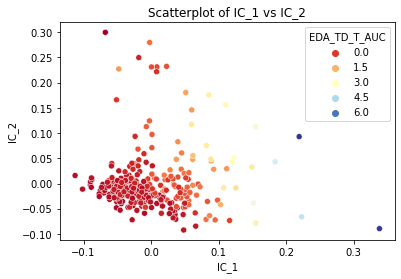

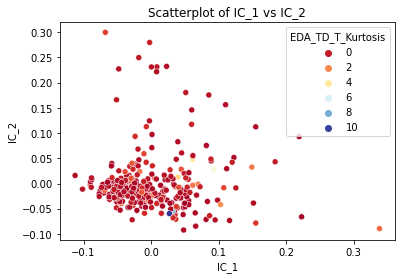

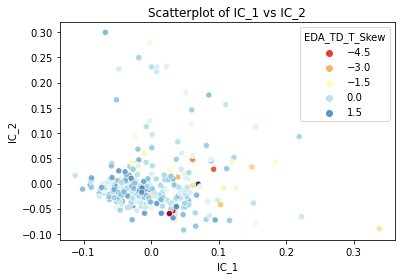

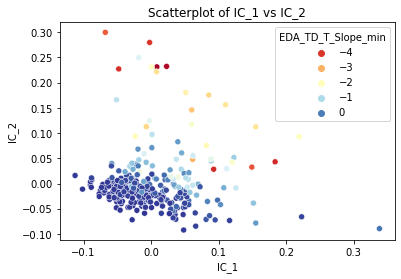

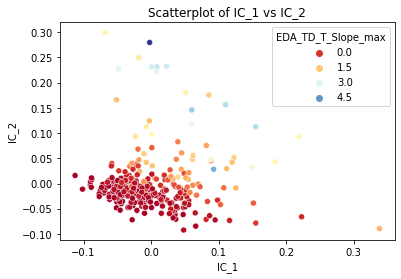

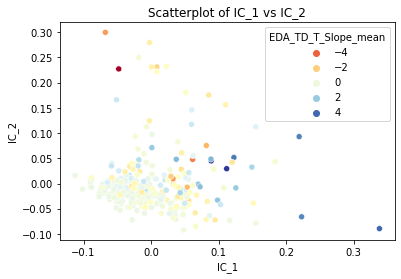

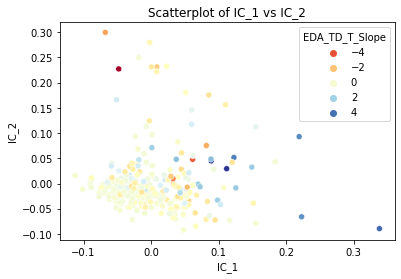

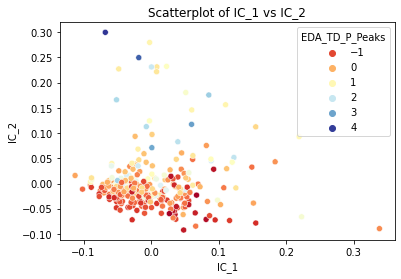

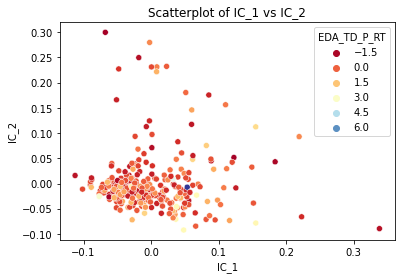

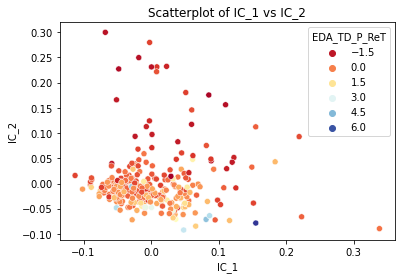

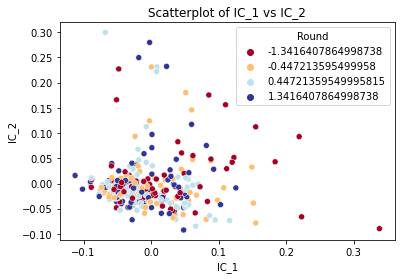

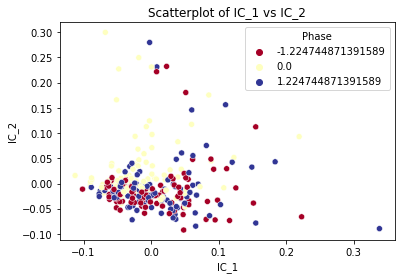

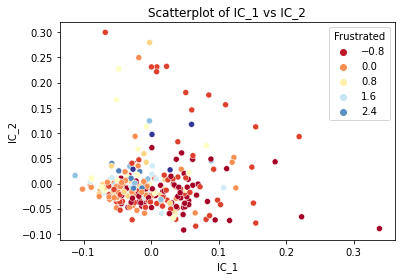

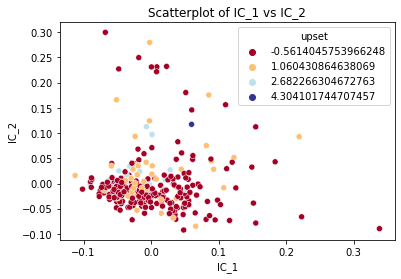

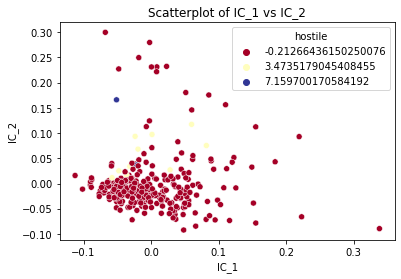

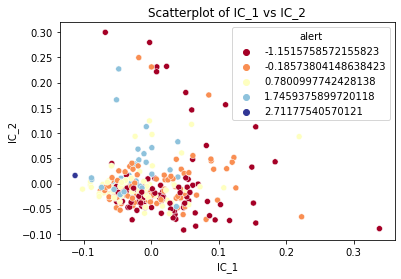

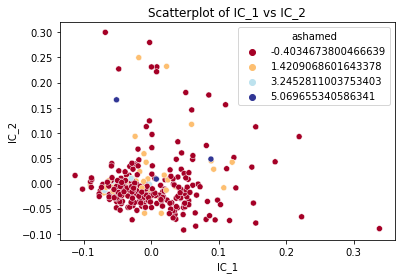

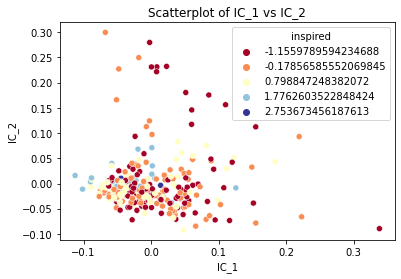

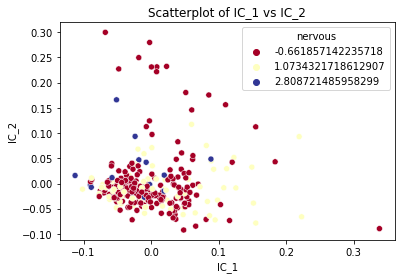

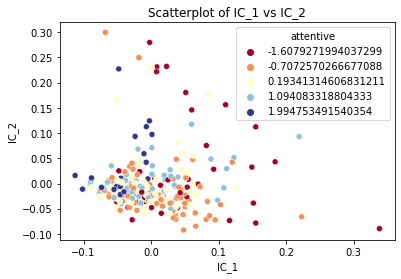

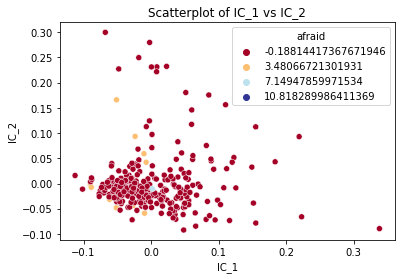

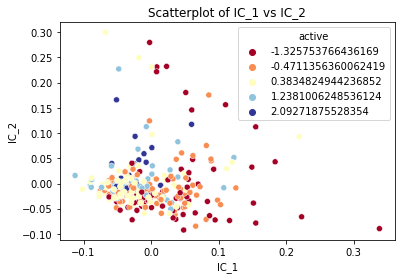

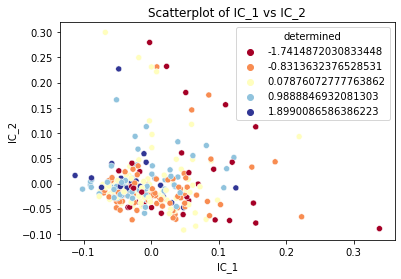

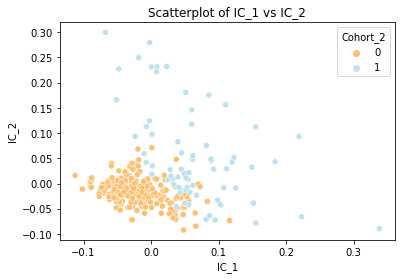

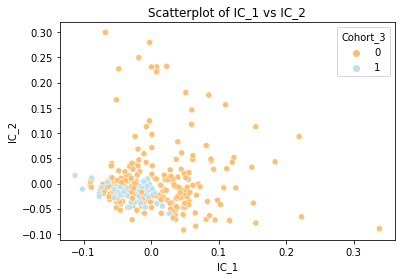

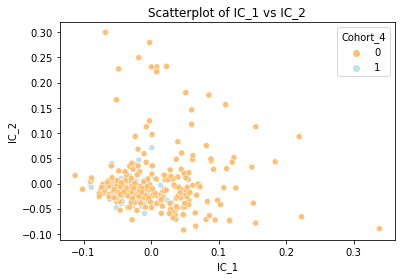

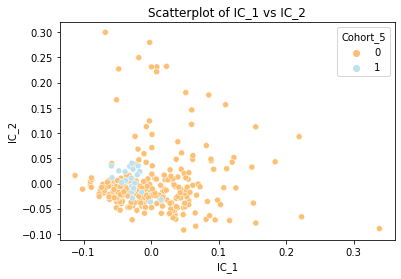

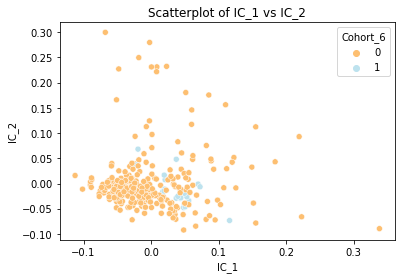

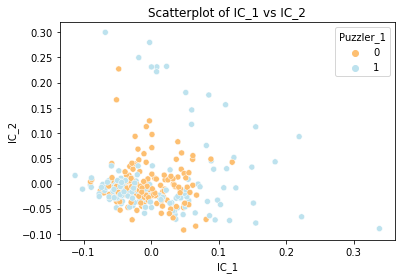

In [15]:
#Visualize ICs in Reduced Space
# If you reduced the data to 2 or 3 ICs, visualize the data in the reduced space to identify clusters or patterns:

import seaborn as sns
for i in X.columns.tolist():
    sns.scatterplot(x=ica_df['IC_1'], y=ica_df['IC_2'], hue=X[i], palette='RdYlBu')
    plt.title("Scatterplot of IC_1 vs IC_2")
    plt.show()